**Scenario 3**



A hospital has a large dataset of patient records, including information on demographics,  medical history, diagnoses, treatments, and outcomes. The hospital wants to use this data  to develop a machine learning model that can predict the risk of readmission for patients  after they are discharged from the hospital. Develop a ML solution for the aforesaid  prediction with an example Dataset.


Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
import numpy as np  # Import the NumPy library for numerical operations
import pandas as pd  # Import the Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for creating plots and charts
import seaborn as sns  # Import Seaborn for data visualization
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Import the LogisticRegression model
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier model
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn import metrics  # Import metrics for various evaluation metrics
from sklearn.metrics import confusion_matrix  # Import confusion_matrix for calculating confusion matrices
from sklearn.metrics import classification_report # Import classification report

Importing Dataset

In [ ]:
df = pd.read_csv("/content/diabetic_data.csv")
df.head() #getting first 5 values

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.tail() #getting last 5 values

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.shape

(101766, 50)

**Data Preprocessing**

Since we can see that the weight columns has ? in it so replacing it will null values

In [ ]:
df = df.replace("?",np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Checking the Null values


In [ ]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Count of each data type

<Axes: xlabel='count'>

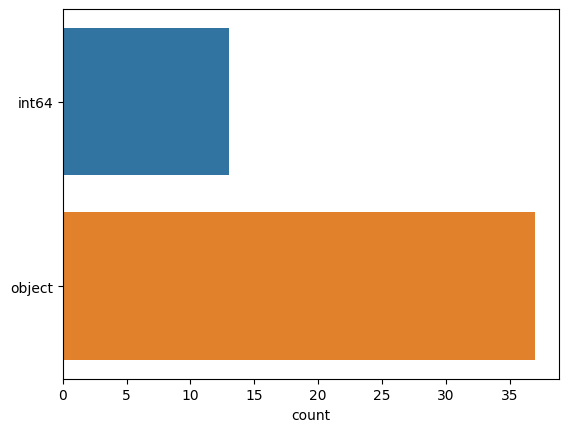

In [ ]:
sns.countplot(data=df,y=df.dtypes)

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


The resulting pie chart will represent the distribution of values in the 'readmitted' column, showing the percentage of each unique value in a visually appealing way.

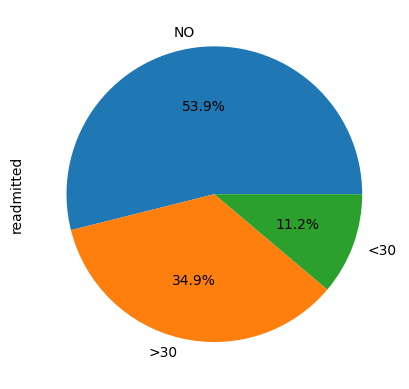

In [ ]:
df['readmitted'].value_counts()/len(df)
counts = df['readmitted'].value_counts()
percentages = counts * 100 / len(df)
fig, ax = plt.subplots()
percentages.plot(kind='pie', ax=ax, autopct='%1.1f%%')
plt.show()

The output of the below code shows the percentage of missing values for columns with more than one missing value. This is helpful for identifying columns with a substantial amount of missing data.

In [ ]:
df.isnull().sum()[df.isnull().sum()>1]/len(df)*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

Dropping The columns weights , payer code and medical specialty since they have more 40% null values

In [ ]:
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [ ]:
df.shape

(101766, 47)

<ipython-input-21-d56b457efb5a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)


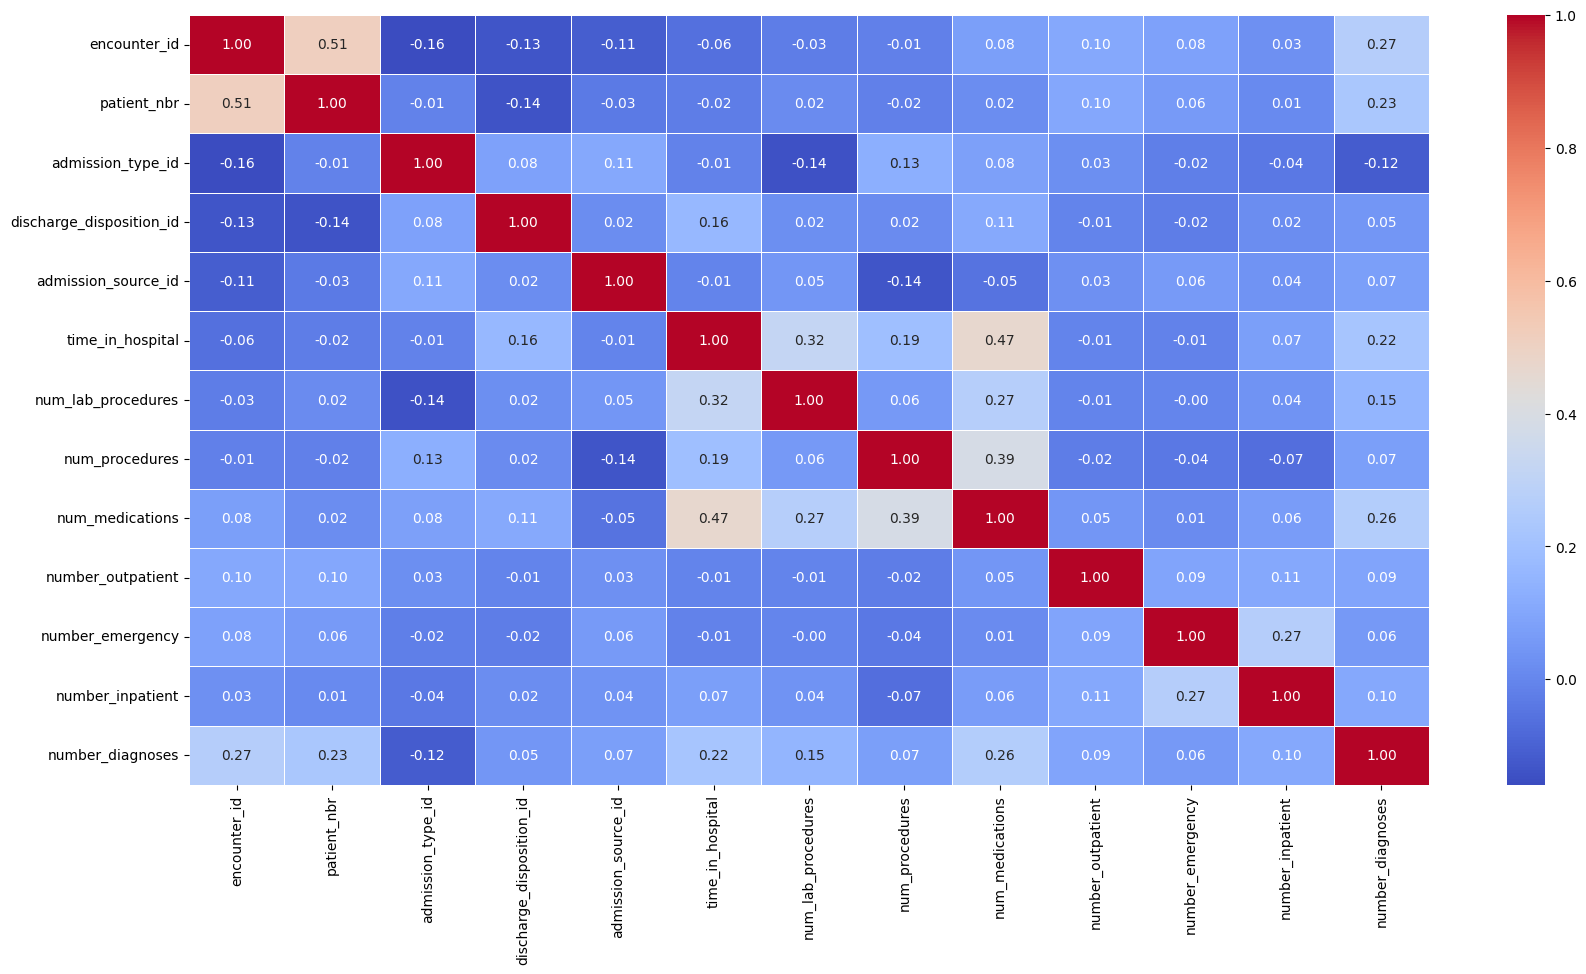

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.show()
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed


In [ ]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

Encoding the Values in Readmitted

Considering only patients who are readmitted within 30 days, those who are readmitted after 30 days are considered as not readmitted.
# Because in general if a patient is readmitted within 30 days then it is considered as emergency case , else it is considered as new case

0    90409
1    11357
Name: readmitted, dtype: int64


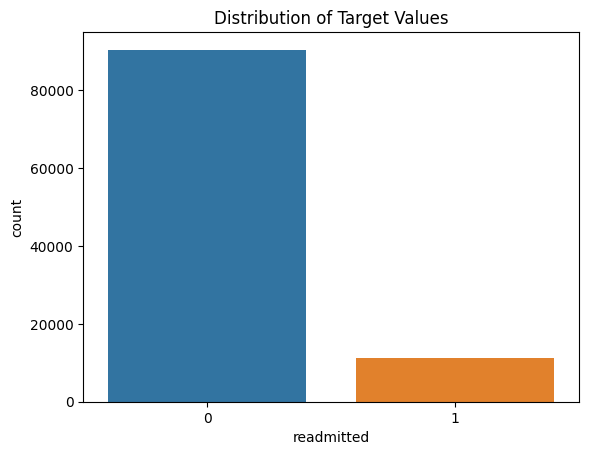

In [ ]:
df = df.replace({"NO":0,"<30":1,">30":0})
print(df.readmitted.value_counts())
sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

Proportion of values in Readmitted

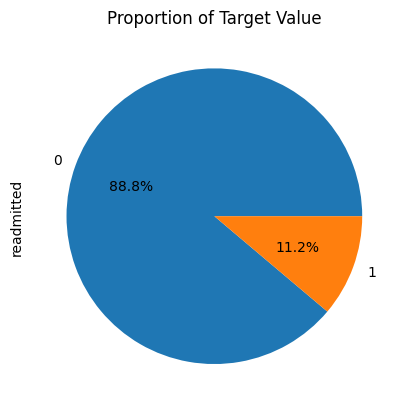

In [ ]:
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

Proportion of Race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


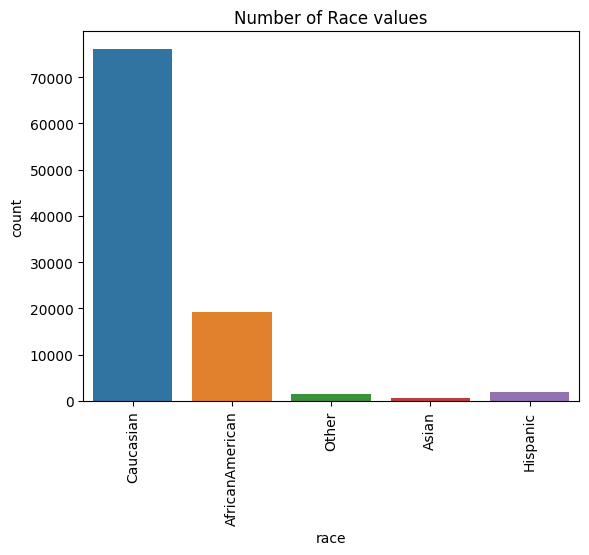

In [ ]:
print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)
sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

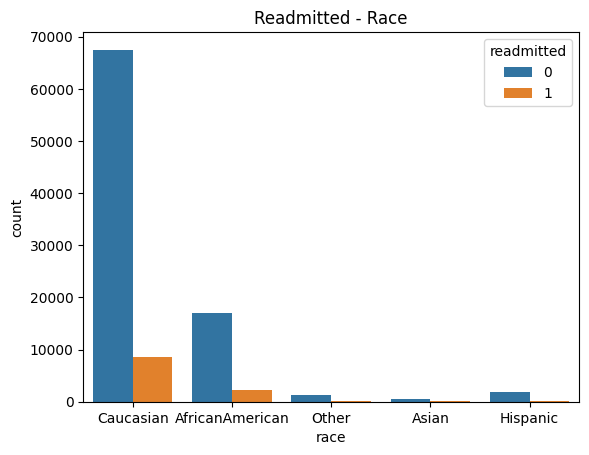

In [ ]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

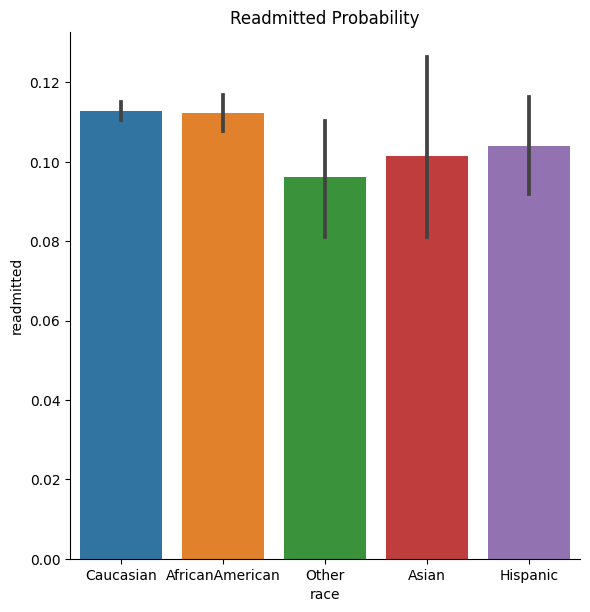

In [ ]:
sns.catplot(x = "race", y = "readmitted",data = df, kind = "bar", height= 6)
plt.title("Readmitted Probability")
plt.show()

Proportions of Race Value
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


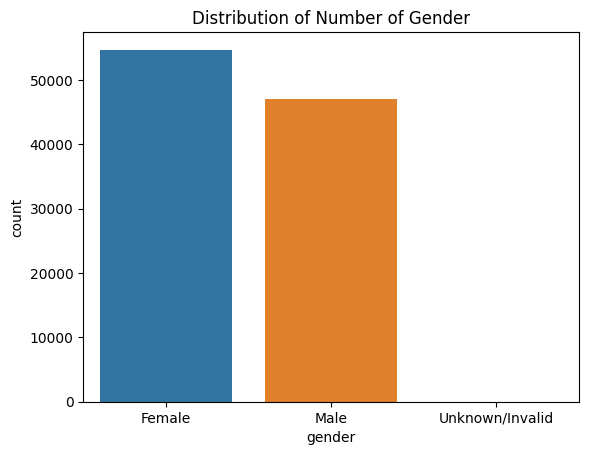

In [ ]:
print("Proportions of Race Value")
print(df.gender.value_counts(normalize = True))

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()


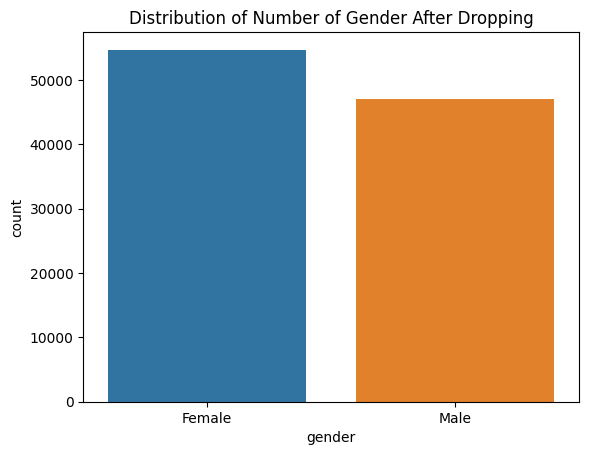

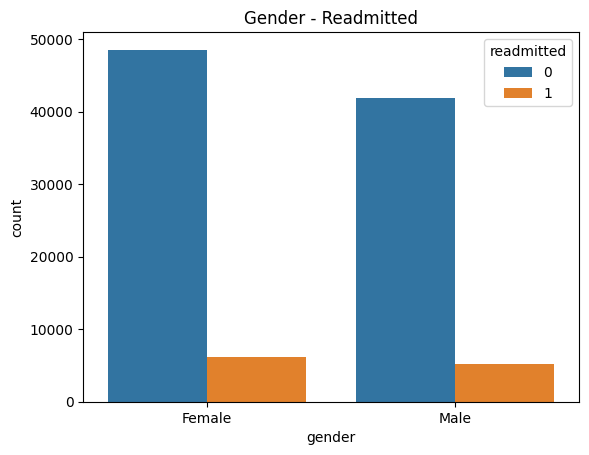

In [ ]:
df = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

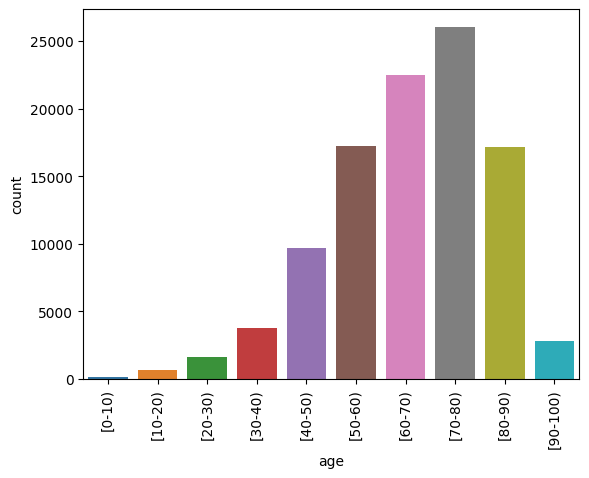

In [ ]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

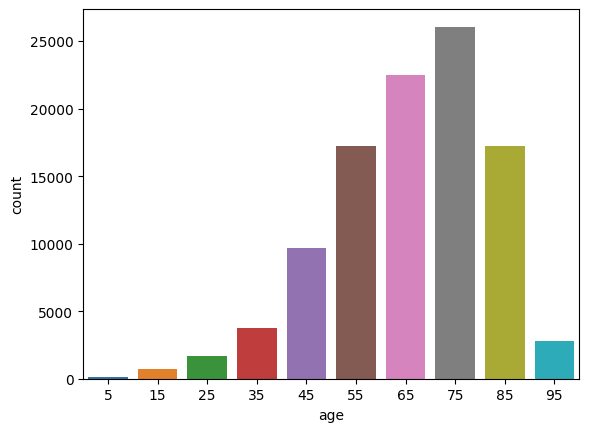

In [ ]:
df.age = df.age.replace({"[70-80)":75,"[60-70)":65,"[50-60)":55,"[80-90)":85,"[40-50)":45,"[30-40)":35,"[90-100)":95,"[20-30)":25,"[10-20)":15,"[0-10)":5})
sns.countplot(x="age", data = df)
plt.show()

Distribution of ID's
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


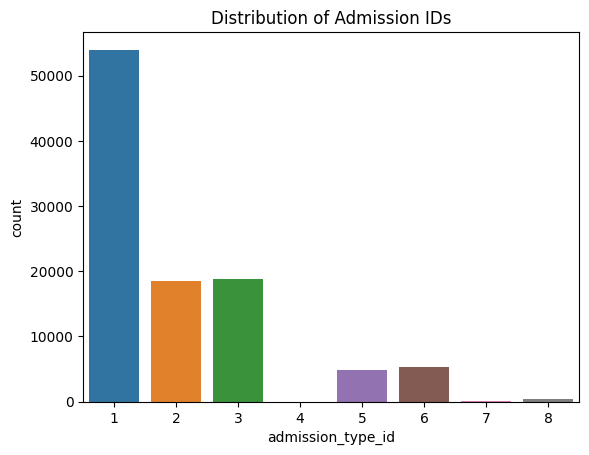

In [ ]:
print("Distribution of ID's")
print(df.admission_type_id.value_counts())

sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

In [ ]:
df.admission_type_id.unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

Feature Engineering

**The below encoding has been done by going through the detailed descriptions about the data**

In [ ]:
mapped = {1.0:"Emergency",2.0:"Emergency",3.0:"Elective",4.0:"New Born",5.0:np.nan,6.0:np.nan,7.0:"Trauma Center",8.0:np.nan}
df.admission_type_id = df.admission_type_id.replace(mapped)
print("-Distribution of ID's-")
print(df.admission_type_id.value_counts())

-Distribution of ID's-
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


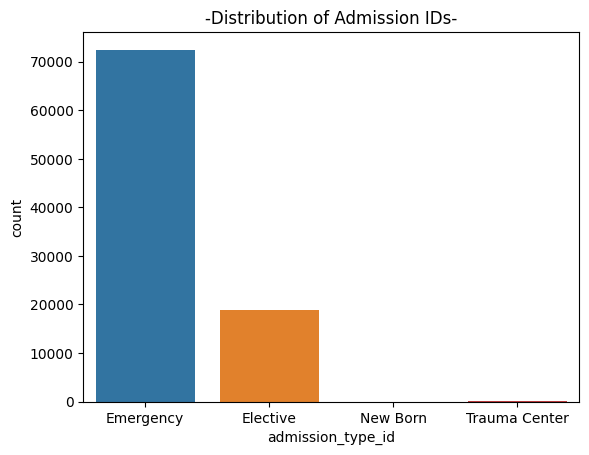

In [ ]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("-Distribution of Admission IDs-")
plt.show()

In [ ]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

In [ ]:
df['discharge_disposition_id'].unique()

array([nan, 'Discharged to Home', 'Other'], dtype=object)

Proportions of ID's
Discharged to Home    73649
Other                 23434
Name: discharge_disposition_id, dtype: int64


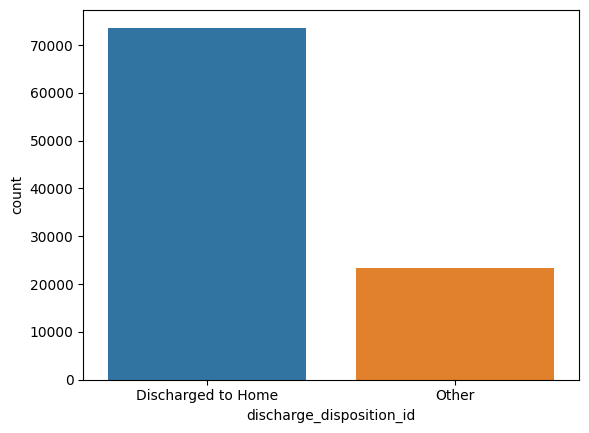

In [ ]:
print("Proportions of ID's")
print(df.discharge_disposition_id.value_counts())

sns.countplot(x ="discharge_disposition_id", data = df)
plt.show()



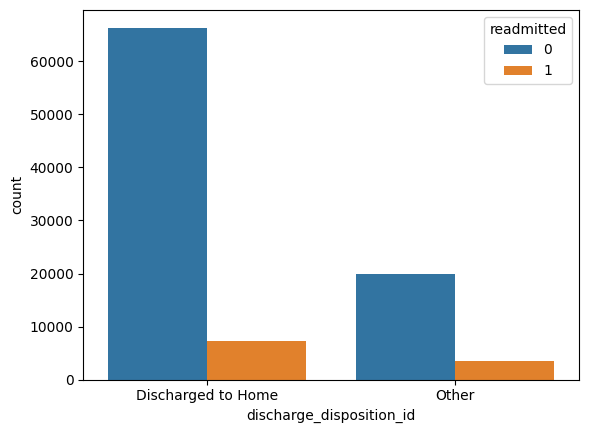

In [ ]:
sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = df)
plt.show()

Emergency    57492
Referral     30855
Other         6474
Name: admission_source_id, dtype: int64


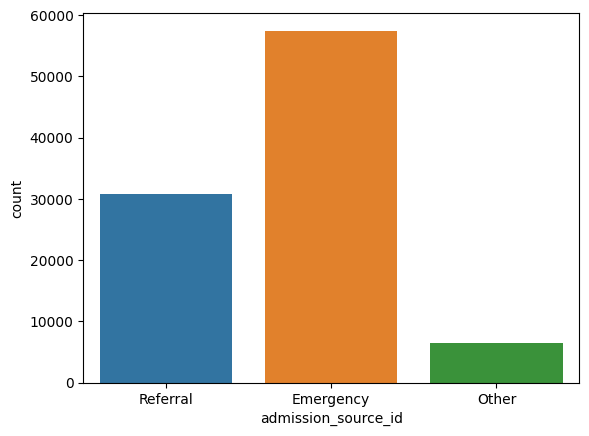

In [ ]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
df.admission_source_id = df.admission_source_id.replace(mapped_adm)
print(df.admission_source_id.value_counts())

sns.countplot(x = "admission_source_id", data = df)
plt.show()



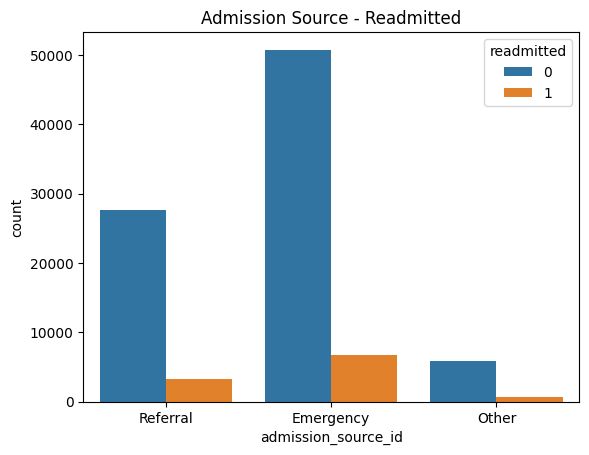

In [ ]:
sns.countplot(x = "admission_source_id", hue = "readmitted", data = df)
plt.title("Admission Source - Readmitted")
plt.show()

3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


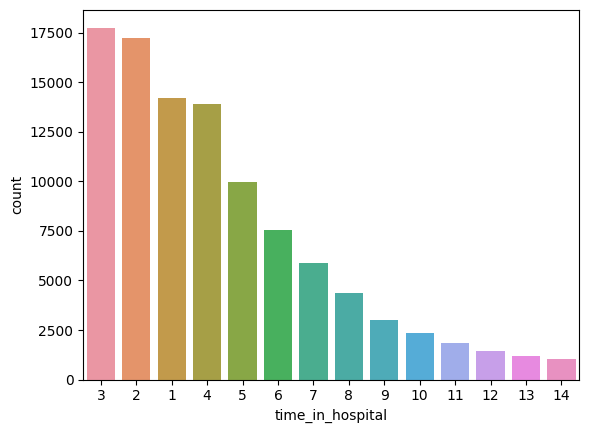

In [ ]:
print(df.time_in_hospital.value_counts())

sns.countplot(x="time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

In [ ]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

df['admission_type_id'] = df['admission_type_id'].fillna(df['admission_type_id'].mode()[0])

df['discharge_disposition_id'] = df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0])

df['admission_source_id'] = df['admission_source_id'].fillna(df['admission_source_id'].mode()[0])

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [ ]:
cat_data = df.select_dtypes('O')
num_data = df.select_dtypes(np.number)
cat_data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Emergency,Discharged to Home,Referral,250.83,NaN,NaN,None,None,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to Home,Emergency,276,250.01,255,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,Emergency,Discharged to Home,Emergency,648,250,V27,None,None,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to Home,Emergency,8,250.43,403,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,Emergency,Discharged to Home,Emergency,197,157,250,None,None,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Other,Emergency,250.13,291,458,None,>8,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,Emergency,Other,Other,560,276,787,None,None,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to Home,Emergency,38,590,296,None,None,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,Emergency,Other,Emergency,996,285,998,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

In [ ]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()
data['glipizide'].unique()

array([1, 2, 3, 0])

In [ ]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,0,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,1,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,0,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,0,1


Divding data into X and y

In [ ]:
X = data.drop('readmitted',axis=1)
y = data['readmitted']

Splitting Dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Scaling the data

In [ ]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((81410, 44), (20353, 44), (81410,), (20353,))

# Model Development

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Applying LDA and Grid Search CV with Logistics Regression

In [ ]:
logistic_regression = LogisticRegression()
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],              # Regularization type
}

grid_search_logistic = GridSearchCV(logistic_regression, param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train_scaled, y_train)

# Print the best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:")
print(grid_search_logistic.best_params_)
print("Best accuracy for Logistic Regression:", grid_search_logistic.best_score_)

# Hyperparameter tuning for Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
param_grid_lda = {
    'solver': ['lsqr', 'eigen'],  # Solver for LDA
    'shrinkage': [None, 'auto'],  # Regularization parameter for lsqr solver
}

grid_search_lda = GridSearchCV(lda, param_grid_lda, cv=5, scoring='accuracy')
grid_search_lda.fit(X_train_scaled, y_train)

# Print the best hyperparameters for LDA
print("\nBest hyperparameters for LDA:")
print(grid_search_lda.best_params_)
print("Best accuracy for LDA:", grid_search_lda.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best hyperparameters for Logistic Regression:
{'C': 0.001, 'penalty': 'l2'}
Best accuracy for Logistic Regression: 0.8882078368750767


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-packages


Best hyperparameters for LDA:
{'shrinkage': None, 'solver': 'lsqr'}
Best accuracy for LDA: 0.885935388772878


Applying PCA and Grid Search CV with Logistics Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('pca', PCA()),  # PCA as the first step
    ('logistic', LogisticRegression())  # Logistic Regression as the second step
])

# Define the hyperparameter grid for both PCA and Logistic Regression
param_grid = {
    'pca__n_components': list(range(1,X_train_scaled.shape[1]+1,1)),  # Number of components to keep after PCA
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'logistic__penalty': ['l1', 'l2']  # Regularization type for Logistic Regression
}

# Create the GridSearchCV object to search over the hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the best accuracy
print("Best hyperparameters:")
print(grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1320 fits failed out of a total of 2640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
T

Best hyperparameters:
{'logistic__C': 0.001, 'logistic__penalty': 'l2', 'pca__n_components': 36}
Best accuracy: 0.8882692543913524


we can see that the best model is with 36 parameters

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.40      0.01      0.02      2253

    accuracy                           0.89     20353
   macro avg       0.64      0.50      0.48     20353
weighted avg       0.84      0.89      0.84     20353



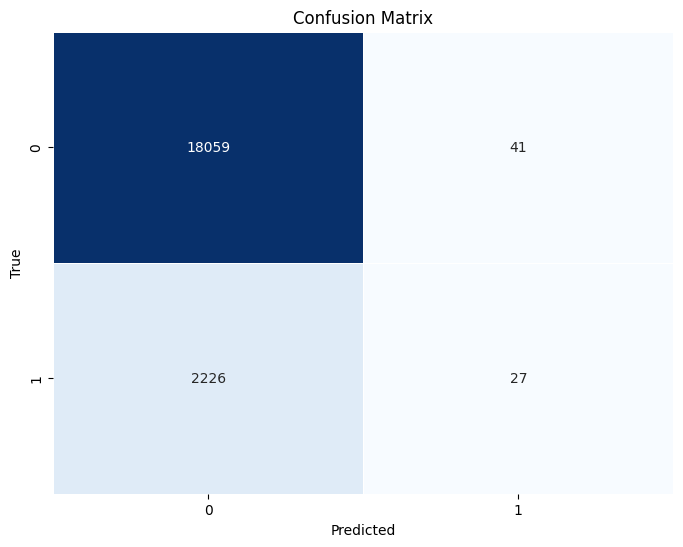

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Applying Logistics Regression
with all the features



In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled,y_train)

0.8881464193588011

In [ ]:
lr.score(X_test_scaled,y_test)

0.8883211320198496

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[18087,    13],
       [ 2250,     3]])

In [ ]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.19      0.00      0.00      2253

    accuracy                           0.89     20353
   macro avg       0.54      0.50      0.47     20353
weighted avg       0.81      0.89      0.84     20353



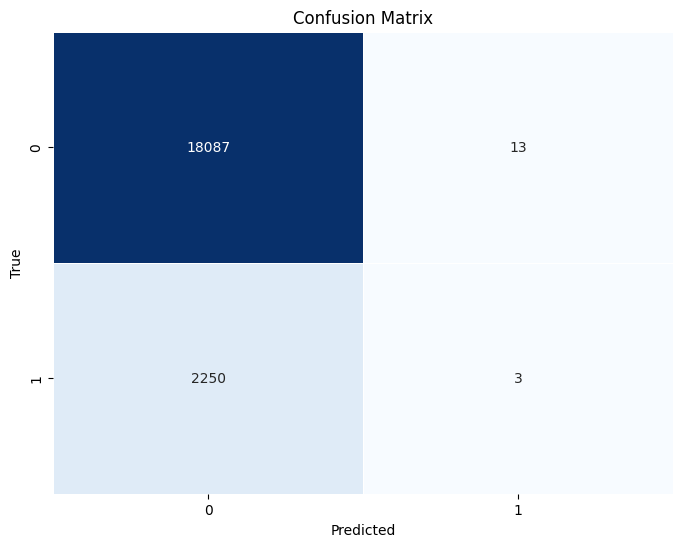

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Applying Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf.score(X_train_scaled,y_train)

0.9999754329934898

In [ ]:
rf.score(X_test_scaled,y_test)

0.8894511865572643

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[17895,   205],
       [ 2190,    63]])

In [ ]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     18100
           1       0.24      0.03      0.05      2253

    accuracy                           0.88     20353
   macro avg       0.56      0.51      0.49     20353
weighted avg       0.82      0.88      0.84     20353



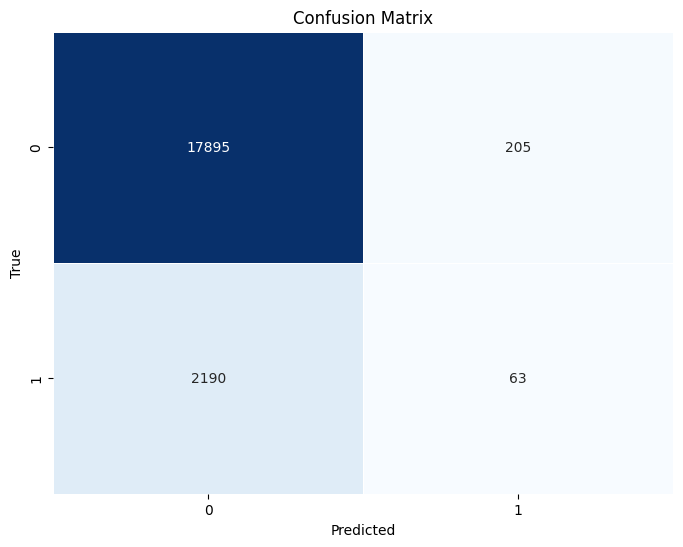

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Applying XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.39      0.02      0.04      2253

    accuracy                           0.89     20353
   macro avg       0.64      0.51      0.49     20353
weighted avg       0.84      0.89      0.84     20353



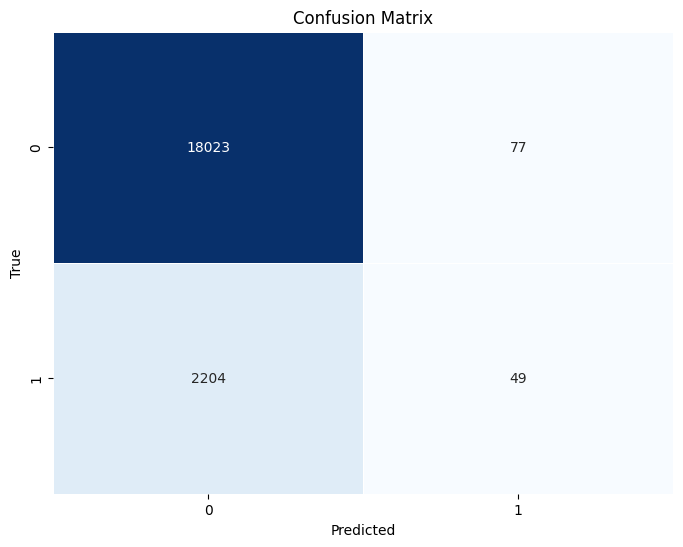

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Applying Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)


In [ ]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.90      0.87      0.88     18100
           1       0.16      0.20      0.18      2253

    accuracy                           0.80     20353
   macro avg       0.53      0.53      0.53     20353
weighted avg       0.82      0.80      0.81     20353



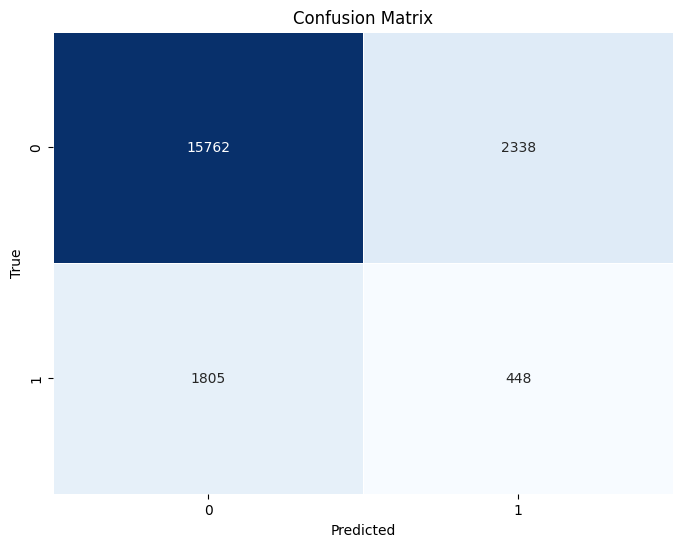

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# We can see that Logistics Regression is giving the best acccuracy of 89%